# Statistics

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = (5.0, 4.0)

> Note: after this notebook, we will go through a [complete EDA example on the Penguins dataset](../scenario/03_eda_penguins_exercise.ipynb).

- **Statistics** summarizes qualities of a group (of people or things) numerically or visually.
- It all start with: **Counting**.

## Proportion

**Proportion** ($\hat p$): is a fraction of the sample that has a certain characteristic. In other words, **relative frequency** often expressed in precentage.

In [4]:
df = pd.DataFrame({
    'Gender': ["M", "M", "M", "M", "M", "F", "F", "F", "F", "F", "F", "F", "F", "F", "F"]
})
df.value_counts(normalize=True)

Gender
F         0.666667
M         0.333333
Name: proportion, dtype: float64

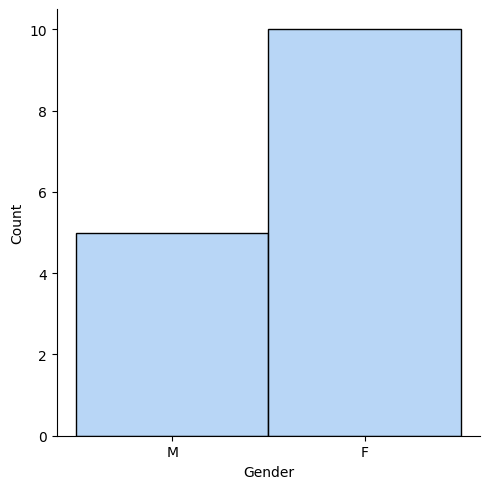

In [ ]:
sns.displot(df, x='Gender')

## Comparing Distributions: Human Height & NBA Players

Let's look at the counts *Binned* per height groups, for NBA Players.

In [ ]:
df = pd.read_csv('../datasets/nba/nba_heights.csv')
df.head()

,last_name,first_name,h_meters,h_in
0,Acker,Alex,1.96,77
1,Adams,Hassan,1.93,76
2,Afflalo,Arron,1.96,77
3,Ager,Maurice,1.96,77
4,Ajinca,Alexis,2.13,84


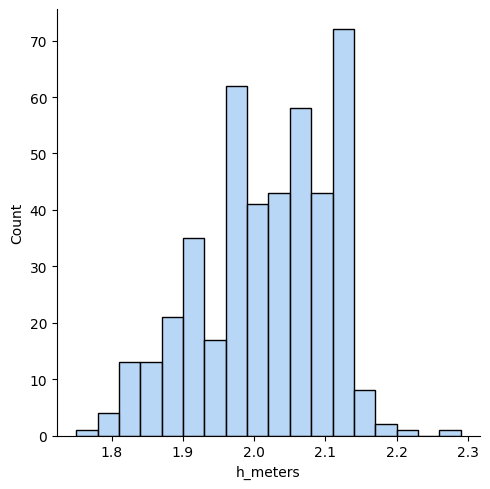

In [ ]:
sns.displot(df, x='h_meters')

![](../assets/desc-stats/nba-comic.png)

You might ask yourself:

1. Are NBA players really taller than most people? or is it a false stereotype?
1. How likely is it that a randomly picked NBA player is shorter than a typical person?
1. How much taller is an NBA player compared to the typical height?
1. Are there short NBA players? How many?
1. If my height is X, how likely is it that I am taller than an NBA player?

To find out, the answer to such questions, we'll need to use statistics.

Below are the distributions of height in centimeters across:

- Adult women globally (mean of `159cm` and standard deviation of `6cm`)
- Adult men globally (mean of `171cm` and standard deviation of `7cm`)
- NBA players; a specific subset of adult men (~2300 players who have been part of an NBA team roster between 1996 and 2019)

Let's visualize it:

![Image Source: https://distributionofthings.com/human-height/](../assets/desc-stats/nba.png)

The figure above shows two **"Normal"** distributions:

1. with different centers
2. and increaing dispersion (as we go right)

Can you give approximate answers to those questions now?

## Data Distribution

The distribution of a value of an attribute among data points can be described in two ways:

1. **Central Tendency**
    1. **Mode**: the most frequent value ($\bar{x}$ or $\mu$)
    2. **Median**: the middle value
    3. **Mean**: the center of "mass"
2. **Dispersion**:
    1. **Range**: the difference between the maximum and minimum values
    2. **Variance**: the average of the squared differences from the mean ($\sigma^2$)
    3. **Standard Deviation**: the square root of the variance ($\sigma$)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/33/Visualisation_mode_median_mean.svg/225px-Visualisation_mode_median_mean.svg.png">

See the [Statistical Measures Reference](../techniques/ref_statistical_measures.ipynb) notebook for more details.

## The Normal / Gaussian Distribution

The **Normal Distribution** (or **Gaussian Distribution**) is a bell-shaped distribution that is symmetric around the mean, with the highest density of data points in the center.
An example of a bell curve distribution (normal / gaussian distribution) would be ...

if students in a math class took a final exam, and the class average was 7.5 out of 10 and the standard deviation was 0.5 points. If the class scores follow a normal distribution, then this means that:

- 68% of the students received a score between 7.0 and 8.0 on the test, or the mean (7.5) plus or minus 1 standard deviation (0.5)
- 95% of students received a grade between 6.5 and 8.5 on the exam, or the mean (7.5) plus or minus 2 standard deviations (1.0)
- 99.7% of students received a grade between 6.0 and 9.0, or the mean (7.5) plus or minor 3 standard deviations

**The following is an interactive example which you can try out to play with the normal distribution**:

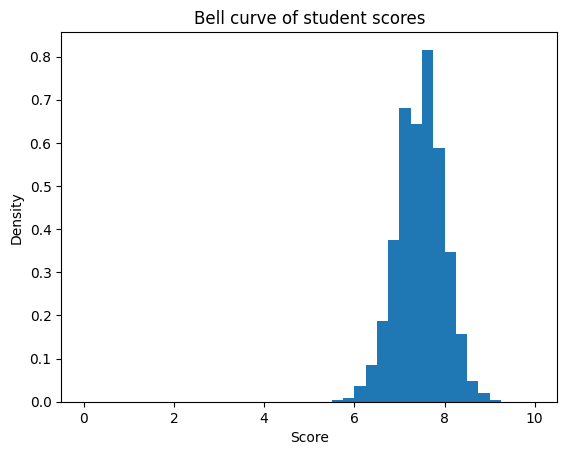

In [ ]:
# Generate a NumPy ndarray of 1000 elements sampled from a normal distribution
# with the specified mean and standard deviation.
scores = np.random.normal(
    loc=7.5,   # Mean
    scale=0.5, # Standard Deviation
    size=1000, # Number of observations
)

# Plot the bell curve of the data.
plt.hist(scores, bins=40, density=True, range=(0, 10))
plt.xlabel("Score")
plt.ylabel("Density")
plt.title("Bell curve of student scores")
plt.show()

**Try and Observe**: try changing the mean and standard deviation in the above code to see how normal curve behaves.

> **Why is the Normal Distribution Important?**
> 
> The answer lies within the [**Central Limit Theorem**](../techniques/central_limit_theorem.ipynb).

### Example of Normal Distribution: IQ Distribution

![](../assets/desc-stats/comparative-sex-iq-distribution.png){height=380px}

The figure above shows two **Normal** distributions:

1. with the same **Mean** (center)
2. but different **Standard Deviation** (dispersion).

**Common Misconception**: People often see the red curve is much taller and mistakenly conclude that: "**there are more women in the dataset than men**". Wrong! In reality, the area under the curve represents the total population, not the height of the peak. Notice that both the red curve (Women) and the blue curve (Men) peak at the same point on the x-axis (IQ ≈ 100). This indicates that the **mean**, **median**, and **mode** for both groups are approximately equal.
* The **red curve** (women) is taller and narrower, meaning it has **lower variance**. Most data points are clustered very tightly around the average.
* The **blue curve** (men) is shorter and wider, meaning it has **higher variance** (a larger standard deviation). There are more men at the extreme ends of the spectrum; both the very low and the very high IQ scores.

### Example of Non-normal: Distrubtion of Death by Age in Australia in the Year 2012

![](../assets/desc-stats/deaths-in-australia-in-the-year-2012.png){height=380px}


The figure above shows a **left-tailed exponential distribution**.

The graph shows "Deaths in Australia in the year 2012." This is an excellent example of a **Negatively Skewed (Left-Skewed)** distribution.

* **Direction of Skew:** A distribution is named by the direction of its "tail." Here, the tail extends toward the younger age brackets (the left). This indicates that while most people die at older ages, a smaller number of "outliers" die much younger, pulling the average down.
* **The Relationship Between Mean, Median, and Mode:** In a perfectly symmetrical curve, these three would be the same. However, in a skewed distribution, they pull apart:
    * **Mode (~87 years):** The "most frequent" age of death, represented by the highest peak.
    * **Median (~81 years):** The middle value; 50% of people died before this age, and 50% after.
    * **Mean (~77 years):** The arithmetic average. It is the most affected by the "tail." Because some people die very young (ages 0–40), the mean is pulled significantly lower than the mode.
* **Insight:** When data is skewed, the **Median** is often a better "typical" representation of the data than the Mean, because the Mean is overly sensitive to extreme outliers (infant mortality or early-life accidents).

## Dividing up Distributions: Quantiles

**Quantiles** are used to divide the data by ranges (**not necessarily equally**)

The most common types of quantiles are:

1. **Percentiles**: divide up the distribution into 100 equal parts.
2. **Quartiles**: divide up the distribution into 4 equal parts.
3. **Deciles**: divide up the distribution into 10 equal parts.

Anytime that a set of data needs to be broken into digestible chunks / groups, *quantiles* are helpful.

The most well-known example of a quantile is the **median**, which divides a distribution in two at its midpoint:

In [ ]:
np.median(scores) == np.quantile(scores, 0.5)

np.True_

### Percentiles \%

**Percentiles** divide the distribution at any point out of one hundred ("pour cent" is French for "out of a hundred").

For example, if we'd like to identify the threshold for the top 5% of a distribution, we'd cut it at the 95th percentile. Or, for the top 1%, we'd cut at the 99th percentile.

#### Example 1: Income Distribution

Sociologists like Dennis Gilbert break societal classes down into six classes based on source of income, occupation, and educational attainment.

The Privileged Classes

* The Capitalist Class (Top 1%)
* The Upper-Middle Class (Next 14%)

The Majority Classes

* The Lower-Middle Class (Next 30%)
* The Working Class (Next 30%)

The Lower Classes

* The Working Poor (Next 13%)
* The Underclass (Bottom 12%)

In [ ]:
# Dummy data of incomes
incomes = np.array([25000, 32000, 45000, 50000, 62000, 75000, 110000, 500000, 1000000])
p = 1

p -= 0.01
top_one_percent = np.quantile(incomes, p)

p -= 0.14
upper_middle_class = np.quantile(incomes, p)

p -= 0.30
lower_middle_class = np.quantile(incomes, p)

p -= 0.30
working_class = np.quantile(incomes, p)

p -= 0.13
working_poor = np.quantile(incomes, p)

p -= 0.12
underclass = np.quantile(incomes, p)

print(f"Top 1%: {top_one_percent}")
print(f"Upper Middle Class: {upper_middle_class}")
print(f"Lower Middle Class: {lower_middle_class}")
print(f"Working Class: {working_class}")
print(f"Working Poor: {working_poor}")
print(f"Underclass: {underclass}")

Top 1%: 960000.0
Upper Middle Class: 421999.99999999994
Lower Middle Class: 67200.0
Working Class: 45000.0
Working Poor: 31720.000000000004
Underclass: 25000.000000000004


#### Example 2: Performance

A kid scored 90 on the exam. What do you think?

- A. the kid studied well
- B. the kid is smart
- C. the test was easy

How do you know which one is more likely to be true?

In [ ]:
import numpy as np
import pandas as pd

# 10 students total.
# 8 students (80%) scored >= 90 (the grade 'A')
# 2 students (20%) scored < 90
data = {
    'Student': ['Student 1', 'Student 2', 'Student A (You)', 'Student 4', 'Student 5', 
                'Student 6', 'Student 7', 'Student 8', 'Student 9', 'Student 10'],
    'Score': [80, 85, 90, 94, 93, 94, 95, 96, 98, 99]
}
df = pd.DataFrame(data)
df

,Student,Score
0,Student 1,80
1,Student 2,85
2,Student A (You),90
3,Student 4,94
4,Student 5,93
5,Student 6,94
6,Student 7,95
7,Student 8,96
8,Student 9,98
9,Student 10,99


In [ ]:
np.quantile(df['Score'], 0.2)

np.float64(89.0)

**Tutorial Notebooks**:

- [Exercise: Penguins EDA](../scenario/03_eda_penguins_exercise.ipynb) (~50 min)
- [Solution: Penguins EDA](../scenario/03_eda_penguins_solution.ipynb)